In [2]:
#install the libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#SETUP THE ENVIROMENTS
from google.colab import userdata
GEMINI_API_KEY=userdata.get('GEMINI-API-KEY')
LANGSMITH_API_KEY=userdata.get('LANGSMITH_API_KEY')
GROQ_API_KEY=userdata.get('GROQ-API-KEY')
TAVILY_API_KEY=userdata.get('TAVILY_API_KEY')

In [5]:
!pip install langchain_groq

In [6]:
LANGSMITH_TRACING=True
LANGSMITH_ENDPOINT="https://api.smith.langchain.com"
LANGSMITH_API_KEY=LANGSMITH_API_KEY
LANGSMITH_PROJECT="pr-minty-mill-90"

In [7]:
import langchain
from langchain_core.messages import AIMessage,HumanMessage
from langchain_groq import ChatGroq

In [8]:
Model = ChatGroq(
    model="qwen-qwq-32b",
    api_key=GROQ_API_KEY
)

In [9]:
Model.invoke("Who is sanan abbasi?")

AIMessage(content='\n<think>\nOkay, so the user is asking, "Who is Sanaan Abbasi?" I need to figure out who that is. Let me start by checking if there\'s a well-known person with that name. Maybe I can think of any public figures, politicians, artists, or athletes named Sanaan Abbasi. The spelling might be important here. Sometimes names can be spelled differently, so maybe it\'s Sanaan Abbasi, Sanaan Abbas, or maybe there\'s a different variation.\n\nFirst, I\'ll consider possible professions. Maybe they\'re a politician? In Pakistan, there are several political families. The Abbasi name rings a bell. Wait, the former Prime Minister of Pakistan, Shahid Khaqan Abbasi, comes to mind. But his name is Shahid, not Sanaan. Could this be a relative? Maybe a family member?\n\nAlternatively, perhaps there\'s a younger person in the family. Maybe Sanaan is a son or daughter of Shahid Abbasi. Let me think. If I can recall, Shahid Abbasi served as Prime Minister in 2017-2018. After his term, he m

In [10]:
# lets startr he basics of grpahs from here.
from langchain_core.messages import AIMessage,HumanMessage

In [11]:
message = HumanMessage(content="Hello my name is waris how are you", name="Human assistant")

In [12]:
human_mesasge = [HumanMessage(content="can you assume that itsraining outside",name="Math Assistnat"),
                AIMessage(content="yes i can assume that its rainig outside",name="AI-Assistant"),
                HumanMessage(content="so could you tell me please that what should i take tea or coffee or some sort of soup"),
                AIMessage(content=" i think you should take the tea with pakoras",name="AI-Assitant"),
                HumanMessage(content="ok got it would you like to tell me  about langchain and langgraph."),
                AIMessage(content="ok got it langgraph and langchain both are best."),
                HumanMessage(content="I WANT TO LEARN and how i can learn that"),
                ]   #conversation hmesha list m huti h isliye humny isko list m wrap kar dea hae.

Model.invoke(human_mesasge)

AIMessage(content='\n<think>\nOkay, the user wants to learn about LangChain and LangGraph and is asking how to start. Let me break this down.\n\nFirst, I should explain what LangChain is. It\'s a framework for developing LLM apps, right? It helps with things like prompt engineering, memory, and chains. Then LangGraph, maybe it\'s related but I\'m not as familiar. Wait, perhaps it\'s a tool for visualizing or managing data flow in LangChain? Or maybe it\'s a separate project. I should make sure I get that right.\n\nThe user might be a developer looking to build applications with large language models. They probably need a structured path to learn these tools. For LangChain, the official documentation is key. Tutorials and examples would help. Maybe they need steps like start with the basics, then try examples, dive into the documentation, and work on projects. \n\nFor LangGraph, if it\'s part of LangChain, I should mention how it integrates. If it\'s a different tool, perhaps explain it

In [20]:
from langchain_community.tools.tavily_search import TavilySearchResults

In [30]:
import os
os.environ["TAVILY_API_KEY"] = TAVILY_API_KEY

In [32]:
tool = TavilySearchResults(max_results=1,api_key=TAVILY_API_KEY)
# let check the current weather of muree
tool.invoke("what is the current weather of murree?")

[{'title': 'Murree (Pakistan) weather - Met Office',
  'url': 'https://weather.metoffice.gov.uk/forecast/twh0vyk4g',
  'content': 'Today. 22° Maximum daytime temperature: 22° Celsius; 11° Minimum nighttime temperature: 11° Celsius; · Fri 6 Jun. 26° Maximum daytime temperature: 26° Celsius;',
  'score': 0.6826801}]

In [34]:
#Edges and graph   ======> we will nake the basic graph

In [35]:
# State define the scehma of the graph like which type of data will flow in the graph
#langchain_state is nothing but it decide the flow of execution in the langgraph.

In [39]:
from typing_extensions import TypedDict

In [41]:
class LearningSate(TypedDict):
  prompt:str

In [47]:
langchain=LearningSate(prompt="what is langchain")

In [48]:
langchain

{'prompt': 'what is langchain'}

In [59]:
print(langchain)
print(langchain["prompt"])
print(langchain["prompt"] + " ","i am")
print(type(langchain))

{'prompt': 'what is langchain'}
what is langchain
what is langchain  i am
<class 'dict'>


In [69]:
from typing_extensions import TypedDict

In [70]:
class langchainState(TypedDict):
  prompt:str

In [71]:
stateUpdate = langchainState(prompt="do you know who is quiad e azam")

In [82]:
print(stateUpdate)
print(stateUpdate["prompt"])
print(stateUpdate["prompt"] + " ","quaid e azam is the founder of pakkistan he was born in 18 december 1876 in karachi.")
print(type(stateUpdate))

{'prompt': 'do you know who is quiad e azam'}
do you know who is quiad e azam
do you know who is quiad e azam  quaid e azam is the founder of pakkistan he was born in 18 december 1876 in karachi.
<class 'dict'>


# ***Nodes***

In [129]:

#nodes are nothing but are python functions that perfoam some actions

def Node1(state:langchainState):
  print("learning_state",state)
  return{"prompt":state["prompt"]+ " "+ "i am"}
def Node2(state:langchainState):
  print("learning_state",state)
  return {"prompt":state["prompt"] + " " + "very very happy"}

# ***Edges***

In [130]:
from langgraph.graph import StateGraph,START,END
from langgraph.graph.state import CompiledStateGraph
from typing_extensions import TypedDict

#define the schema or flow of chat
class LangchainSchema(TypedDict):
  prompt:str


In [131]:
build = StateGraph(state_schema=LangchainSchema)

In [132]:
print(type(build))

<class 'langgraph.graph.state.StateGraph'>


In [133]:
build.add_edge(START,"Node1")
build.add_node("Node1",Node1)
build.add_node("Node2",Node2)
build.add_edge("Node1","Node2")
build.add_edge("Node2",END)

In [134]:
# compile the graph
compiled_graph = build.compile()

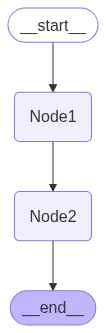

In [135]:
from IPython.display import display,Image
try:
  display(Image(compiled_graph.get_graph().draw_mermaid_png()))
except Exception as e:
  print(f"You make some mistake at {e}")

In [136]:
compiled_graph.invoke({"prompt":"what is langchain"})   #invoke run the graph ansynchronusly.

learning_state {'prompt': 'what is langchain'}
learning_state {'prompt': 'what is langchain i am'}


{'prompt': 'what is langchain i am very very happy'}

In [137]:
#lets integrate the chat model

In [139]:
from typing_extensions import TypedDict

class StatesSchemas(TypedDict):
  prompt:str
  output:str

In [143]:
graph =

In [172]:
def Node1(state:StatesSchemas):
  print("___Node1___",state)
  prompt = state["prompt"]
  output = Model.invoke(prompt).content
  return {"output":output}

In [173]:
Node1({"prompt":"hey my name is"})

___Node1___ {'prompt': 'hey my name is'}


{'output': '\n<think>\nOkay, the user said "hey my name is". Hmm, it looks like they were going to tell me their name but didn\'t finish the sentence. Maybe they got cut off or forgot to add their name. I should respond in a friendly way to invite them to finish. Let me think of a response that\'s welcoming and encourages them to share their name. Something like, "Hello! It\'s nice to meet you. What\'s your name?" Yeah, that sounds good. It acknowledges their message and prompts them to provide their name. I should make sure the tone is positive and approachable. Alright, I\'ll go with that.\n</think>\n\nHello! It\'s nice to meet you. What\'s your name? 😊'}

In [174]:
from langgraph.graph import START,END,StateGraph
from IPython.display import display,Image

In [175]:
APP2 = StateGraph(state_schema=StatesSchemas)

In [176]:
# DEFINE EDGES AND GRAPH
APP2.add_edge(START,"Node1")
APP2.add_node("Node1",Node1)
APP2.add_edge("Node1",END)

# compile the graph
App = APP2.compile()

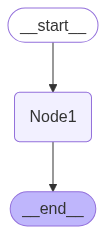

In [177]:
try:
  display(Image(App.get_graph().draw_mermaid_png()))
except Exception as e:
  print(f"you are making some mistake at {e}")

In [178]:
App.invoke({"prompt":"myself is waris how are you wrote a poem on my school firend"})

___Node1___ {'prompt': 'myself is waris how are you wrote a poem on my school firend'}


{'prompt': 'myself is waris how are you wrote a poem on my school firend',
 'output': "\n<think>\nOkay, the user wants a poem about his school friend, and he introduced himself as Waris. Let me start by understanding the request. He probably wants something heartfelt and personal. Since it's a poem, I need to focus on imagery and emotions.\n\nFirst, I should consider the key elements of a school friend. Memories, shared experiences, maybe specific moments like the schoolyard, classrooms, or events. Using nature metaphors could work well—like trees, seasons, stars. Maybe something timeless.\n\nThe poem should have a structure. Maybe four-line stanzas with a rhyme scheme. Let me think of the flow. Start with meeting, then shared moments, challenges, parting, and lasting memories.\n\nNeed to include personal touches. Since the user's name is Waris, maybe mention it subtly. Words like laughter, secrets, growing up. Also, address the passage of time and enduring friendship.\n\nAvoid clichés